# chapter 2

---

In [417]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

---

### `-` logistic funtions

입력 $\beta$값 추정 : 최대우도, cross entropy

출력 : 시그모이드함수, 출력함수 


- binary한 분류 문제에서 y(label)을 0, 1로 취할 수 있을 때
- 0 = nagative class , 1 = positive calss

$$
h_{\theta}(x) = g(\theta^Tx) = \frac{1}{1+e^{-\theta^Tx}}
$$

위와 같이 모형을 가정할 수 있다

$$
g(x) = \frac{1}{1+e^-x}
$$

- sigmoid function
- logistic function

`-` sigmoid function plot showing $g(x)$

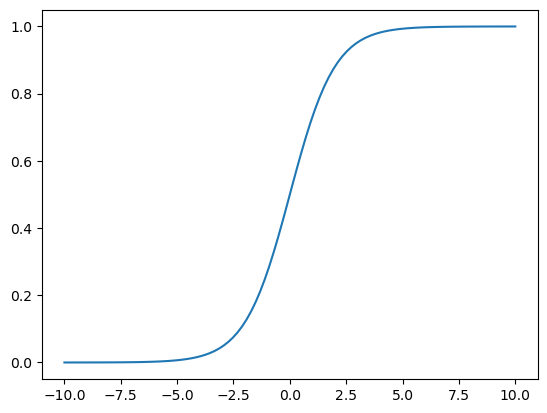

In [602]:
# 시그모이드 함수 정의
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.linspace(-10,10,100)
y = sigmoid(x)
plt.plot(x,y)


$g(x)$는 1또는 0으로 수렴하며 $h(x)$는 0과 1사이로 경계가 되있다.
또한 $x_0 = 1$로 두며, 밑과 이루어진다

`-` logit 선형결합

$$
\theta^Tx = \theta_0 +\sum_{j=1}^{d} \theta_jx_j
$$

`-` sigmoid function 도함수 유도

$$
g'(z)
= g(z)(1-g(z))
$$

$$
= \frac{d}{dz}(1+e^{-z})^{-1} = (-1)\frac{1}{(1+e^{-z})^2}\frac{d}{dz}(1+e^{-z})
\\
= (-1)\frac{1}{(1+e^{-z})^2}(0+e^{-z})\frac{d}{dz}(-z)
\\
= (-1)\frac{1}{(1+e^{-z})^2}(e^{-z})(-1) = \frac{e^{-z}}{(1+e^{-x})^2}
\\
 = \frac{1+e^{-z}-1}{(1+e^{-z})^2} = \frac{1+e^{-z}}{(1+e^{-x})^2} - \frac{1}{(1+e^{-z})^2}
\\
= \frac{1}{(1+e^{-z})} - \frac{1}{(1+e^{-z})^2}
\\ 
\therefore g'(z)= g(z)(1-g(z))
$$

---

`-` 지수함수의 합성 성질
$$
y = e^{f(x)}
\\
y'= e^{f(x)}f'(x) 
$$

`-` 미분 성질

$$
\frac{d}{dx} * \frac{1}{f(x)} = 
\frac{f'(x)}{f(x)^2}
$$

---

`-` how do we fit $\theta$ for it?

- maximum like_lihood estimator
- 활률적 가정을 부여함
- 최대우도법을 통해 model fit

`-` probabilstic assumptions

$$
P(y=1|x;\theta) = h_\theta(x) \\
P(y=0|x;\theta) = 1 - h_\theta(x) \\
$$
`-`
$$
P(y|x;\theta) = h_\theta(x)^y(1-h_\theta(x)^{1-y})
$$

`-` the parameters

$$
L(\theta) = P(\overset{\to}{y}|X;\theta)
\\
= \prod_{i=1}^np(y^i|x^i;\theta) 
\\
= \prod_{i=1}^nh_\theta(x^i)^{y^i}(1-h_\theta(x^i)^{{1-y}^i})
$$

곱셈이 어려우니 log를 취하자

$$
logL(\theta) = \sum_{i=1}^ny^ilogh(x^i)+(1-y^i)log(1-h(x^i))
$$

미분을 이용하여 최대값을 찾음

$$
\frac{{d}}{{dx}}logL(\theta|x) = \sum_{i=1}^n\frac{{d}}{{dx}}logP(x_i|\theta)=0
$$

다만 미분값이 밑과 같으므로 알고리즘을 구현할 때 밑의 방식으로 기울기를 갱신한다


$$
\frac{{d}}{{dx}}logL(\theta|x) = (y-h_\theta(x))x_j 
$$

`-` 유도식

1.$\log{g(x)}$의 미분 $\frac{{1}}{{g(x)}} \cdot \frac{{dg(x)}}{{dx}}$

2.$\log{(1-g(x))}$의 미분 $-\frac{{1}}{{1 - g(x)}} \cdot \frac{{d}}{{dx}} g(x)$

$$
y \cdot \frac{1}{ g(\theta^Tx)}  \frac{{\partial}}{{\partial\theta}} g(\theta^Tx) + (1-y) \cdot 
\frac{1}{(1- g(\theta^Tx))}\frac{{\partial}}{{\partial\theta}} (1- g(\theta^Tx)) 
\\
= \left(y \cdot \frac{1}{ g(\theta^Tx)} - (1-y) \cdot 
\frac{1}{(1- g(\theta^Tx))} \right) \cdot  \frac{{\partial}}{{\partial\theta}} g(\theta^Tx)
$$

$$
 \frac{{d}}{{d\theta}} g(\theta^Tx) = g(\theta^Tx)(1-\theta^Tx)\frac{{d}}{{d\theta}}\theta^Tx
$$

$$
(y \cdot( 1-g(\theta^Tx)) - (1-y) \cdot 
g(\theta^Tx))x =
\\
(y-h_\theta(x)) \cdot x
$$

---

`-` gradiant ascent 

`-`the stochastic gradient ascent rule

$$
    \theta := \theta + \alpha\triangledown_{\theta}logL(\theta)
$$


- 목적 함수의 최대값을 찾기 위함

- 과정(gpt)
    1. 초기값 설정 : 최적화 함수의 시작점 임의 선택
    2. 기울기 계산 : 현위치의 함수 기울기 계산, 이를 위해 편미분을 사용
    3. 이동 방향 결정 : 기울 계산을 통해 얻은 값에 학습률을 곱한 후 이를 이동방향으로 채택 (학습률 -> 얼마나 많이 이동할지 하이퍼 파라미터)
    4. 새 위치 계산 : 현재 위치에 이동 방향을 더하여 새로운 위치 계산
    5. 종료 : 일정 반복 횟수, 수렴 조건에 도달할 때까지 위 과정 반복
    


`-` the perceptron learning algorithm

$$
\theta_j := \theta_j + \alpha
(y-h_\theta(x))x_j
$$

- 임계값(활성화) 함수 g 
- 다른 알고리즘과 비슷해보이지만 매우 다른 타입의 알고리즘이다.
- 의미있는 확률론적 해석을 퍼셉트론의 예측이 주는 것은 어렵고 최대우도법을 통해 이끌어내는 것 또한 어렵다

![](https://mblogthumb-phinf.pstatic.net/MjAxNzA2MTlfMTA3/MDAxNDk3ODQzMjEwMTE4.jXgcNwRTVRbJEDO6JsHOxtftq_h9VxtCjeuCvDd9nCEg.-cCAbXvpIdBqfpS4DkUmpm339EeH3GO3FgnHr95ytiwg.PNG.samsjang/%EC%BA%A1%EC%B2%98.PNG?type=w2)

출처:https://m.blog.naver.com/samsjang/220948258166

---

`-` 구현해보기

러프하게 단계 설명
- gradiant upsent
- 시그모이드함수로 이진분류

`-` 입력 train

In [976]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([1,1,0,0])


- [0,0] , [0,1] $\rightarrow$ 1
- [1,1] , [1,0] $\rightarrow$ 0

`-` 알고리즘학습과 test 

In [1000]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

glist = []
re = []
def binary_classification(X, y, learning_rate=0.1, max_iterations=100):
    # 입력 데이터에 절편을 추가 편향성
    X_bias = np.insert(X, 0, 1, axis=1) #4*3
    # 파라미터 초기화
    theta = np.zeros(X_bias.shape[1]) #3
    
    for _ in range(max_iterations):
        # 선형 결합 계산
        z = np.dot(X_bias, theta) # 4
        # 시그모이드 함수를 적용하여 예측 확률 계산
        y_pred = sigmoid(z) # 입력각 x의 각각의 확률 예측값
        re.append(y_pred)
        
        # 로그 우도 함수를 최대화하는 방향으로 파라미터 업데이트
        gradient = np.dot(X_bias.T, y - y_pred) #3*4 * 4
        theta += learning_rate * gradient
        glist.append(gradient)
        
    return theta

theta = binary_classification(X, y)
theta

array([ 1.581887, -4.009423,  0.388847])

In [1001]:
X_test = np.array([[0, 0],
                   [1, 1],
                   [1,0],
                   [0,1]])
 
# 테스트 데이터에 대한 예측
X_test_bias = np.insert(X_test, 0, 1, axis=1)
y_pred_test = sigmoid(np.dot(X_test_bias, theta))
y_pred_test

array([0.829472, 0.1152  , 0.081097, 0.87769 ])

`-` $\hat{y}$ 의 변화

시작 [0.5 0.5 0.5 0.5]
끝 [0.82809  0.876562 0.08185  0.116156]


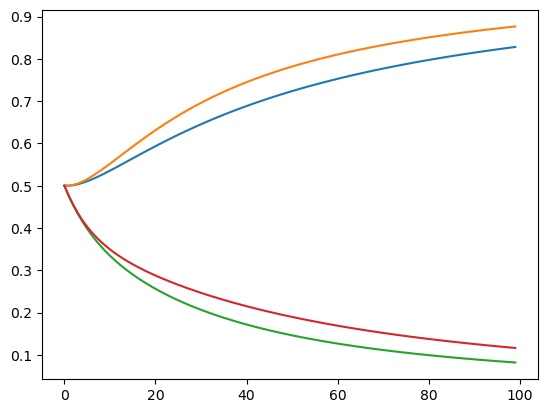

In [1002]:
plt.plot(re);
print('시작',re[0])
print('끝',re[-1])

In [1007]:

theta2=theta+0.1*gradient
print(sigmoid(np.dot(X_bias, theta2)))
print(re[-1])

[0.829472 0.87769  0.07395  0.105393]
[0.82809  0.876562 0.08185  0.116156]


`-` gradient의 변화

시작 [ 0. -1.  0.]
끝 [ 0.097341 -0.198006  0.007282]


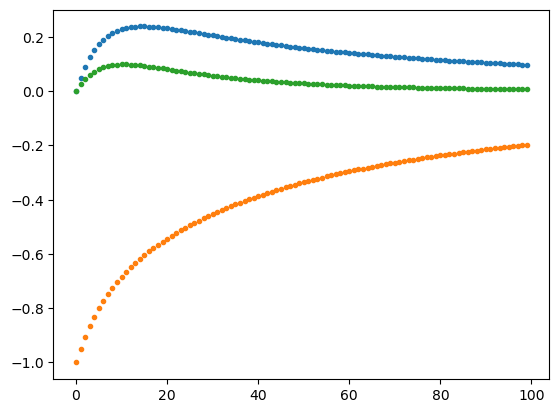

In [1019]:
plt.plot(glist,'.');
print('시작',glist[0])
print('끝',glist[-1])

`-` Q?

$\theta_0$,$\theta_1$,$\theta_2$의 추정된 모수라면

최종적으로 결정된 모수값은 얼만큼의 영향을 주는 수치라고 봐도 되나요?

예를들어 회귀분석에서 추정된 b값이 얼만큼의 변화를 준다는 것처럼

---

다중분류모델 대략적 과정

1. input :  x 입력값

- gradient algorithem
2. logit : y 원핫인코딩 변환, x linear model 선형변환
3. softmax : 최대 우도에 따라 확률값 업데이트
4. 확률값에 따른 y값 출력 
4. loss : cross entropy  

---

### `-` multi_class_classfication

다중 클래스 분류는 구별해야할 y의 값이 3개 이상의 분류문제를 말한다.

input x는 k개의 가능한 이산 결과에 대한 분포이므로 다항 분포이다.

$\theta$^Tx는 반드시 0과 1사이가 아니다

$\theta$^Tx의 합은 무조건 1이 아니다

다만 소프트 함수를 이용하여 $\theta$^Tx를 양수인 확률벡터로 바꿔줄 것이고 이것의 합은 1이다.

---

`-` softmax function

예시 : 3개의 k

$$
softmax(t_1,t_2,t_3) =\begin{bmatrix} \frac{exp(t_1)}{exp(t_1)+exp(t_2)+exp(t_3)} \\ \frac{exp(t_2)}{exp(t_1)+exp(t_2)+exp(t_3)} \\ \frac{exp(t_3)}{exp(t_1)+exp(t_2)+exp(t_3)}\end{bmatrix}
$$


- the vector t 는 logit이라고 불림
logits = np.dot(X, W) + b

- 또한 소프트맥스의 출력값은 nonngetive 하고 합은 1임


`-` loss function

손실함수 : 머신러닝에서 모델이 나타내는 확률 분포와 데이터가 따르는 실제 확률 분포 사이의 차이를 나타내는 함수

- 음의 로그우도 $\rightarrow$ 확률이 커질 수록 손실이 최소화
- gradient를 수정해나가면서 손실을 최소화하는 쪽으로 나아감
- 손실함수의 값이 작아질수록 모델의 성능이 향상, 정확한 예측
- 과적합 문제

$$
-log p(y|x,\theta) = - log(\frac{exp(t_y)}{\sum_{i=1}^nexp(t_j)})
$$

`-` the cross entropy function

$$
H_p(q) = -\sum_{x=i}^nq(y_i)logp(y_i)
$$

`-` 이진분류의 크로스엔트로피

In [830]:
y=1 # 0 -> x , 1-> o
p=0.99
-(y*np.log(p)+(1-y)*np.log(1-p))

# 정답이 틀릴 경우 엔트로피의 증가

0.01005033585350145

예측 모형은 실제 분포인 q 를 모르고, 모델링을 하여 q 분포를 예측하고자 하는 것이다. 예측 모델링을 통해 구한 분포를 p(x) 라고 해보자. 실제 분포인 q를 예측하는 p 분포를 만들었을 때, 이 때 cross-entropy 는 위와 같이 정의된다. 

- 두 확률 분포가 서로 얼마나 다른지를 나타내는 정략적인 지표
- 엔트로피를 줄이기 위한 파라미터를 구하는 것이 결국 음의 로그우도를 최소화하는 파라미터를 구하는 것과 동일하다.

---

`-` the gradient of the loss 

$$
\frac{\partial}{\partial \theta_i}\mathscr{l}(\theta) =
\sum_{j=1}^n(\phi_i^j - 1\left\{ y^j = i \right\}) \cdot x^j
$$

- the cross entropy의 편미분은 로그-소프트맥스의 도함수를 이용하여 계산이 가능하다.따라서 simple gradient를 가짐
- error만으로도 이미 gradient 값을 내고 있으니



---

`-` newton's method

함수의 해를 근사하는 방법 $\rightarrow$ 테일러전개

2차식을 예제로 테일러 전개

$$
f(x) = f(a)+f'(a)(x-a)
$$

f(x)가 0이 되도록 계속 업데이트

$$
f(a)+f'(a)(x-a) = 0 , \\
x-a = \frac{-f(a)}{f'(a)} \rightarrow x_{t+1} = x_t - \frac{f(x_t)}{f'(x_t)}
$$

- 목적 함수의 최적화
- 해가 여러개일 경우 문제
- 미분이 가능해야함
- 초기값 설정이 중요

`-` 예시

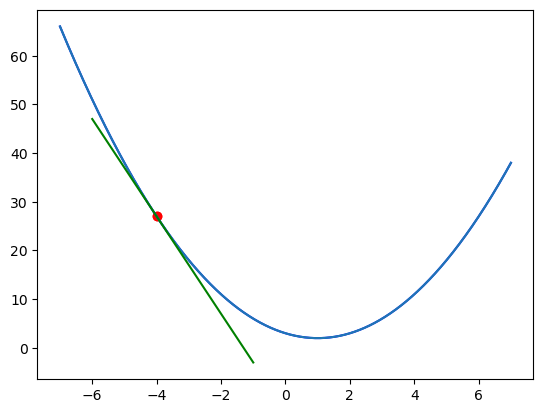

In [1023]:
# (x - 3) ** 2 + 2
def f(x):
    return (x - 1) **2  + 2

def derivate(f): 
    h=0.0000000000001
    return lambda x: (f(x+h)-f(x))/h 

x = np.linspace(-7, 7, 1000)
y = f(x)
plt.plot(x, y,color='blue')
plt.scatter(-4, f(-4),color = 'red')

x0 = -4
y0 = f(x0)
slope = 2 * (x0 - 1)  

# 그래프 그리기
plt.plot(x, y)
plt.scatter(x0, y0, color='red', label='Point (4, f(4))')

# 직선 그리기
x_line = np.linspace(x0 - 2, x0 + 3, 100)
y_line = slope * (x_line - x0) + y0
plt.plot(x_line, y_line, color='green', label='Tangent Line')


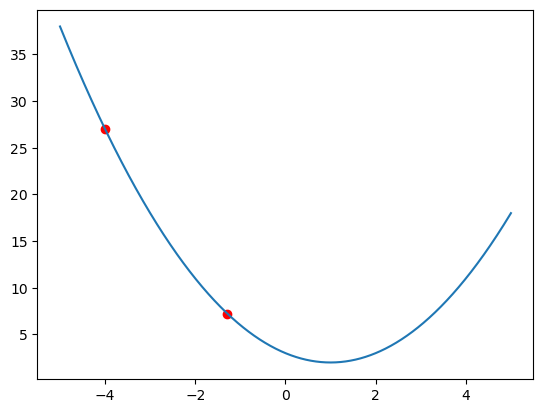

In [931]:
t1 = -4-f(-4)/derivate(f)(-4)
plt.plot(x, y)
plt.scatter(-4, f(-4),color = 'red')
plt.scatter(t1, f(t1),color = 'red')

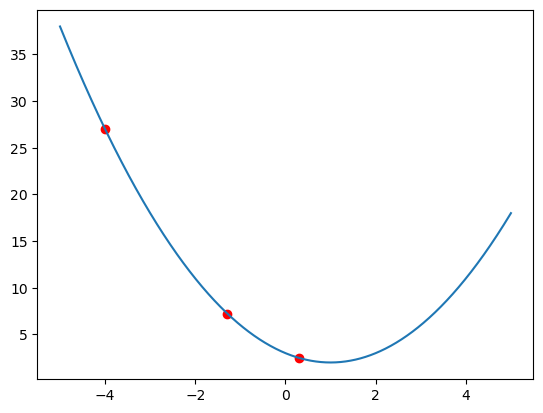

In [932]:
t2 = t1-f(t1)/derivate(f)(t1)
plt.plot(x, y)
plt.scatter(-4, f(-4),color = 'red')
plt.scatter(t1, f(t1),color = 'red')
plt.scatter(t2, f(t2),color = 'red')

newton's method는 일반적으로 gradient descent보다 더 빠르게 수렴하고 적은 반복이 필요 

`-` newton's method의 일반화
- 다차원 설정에 대한 방법 뉴턴-랩슨
- hessian

Hessian matrix는 기본 bowl 형태의 함수를 더 볼록하거나 오목하게 만들어주는 변환이다

---

In [1020]:
class SoftmaxRegression:
    def __init__(self, learning_rate=0.1, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.re1 = []
        self.re2 = []
        self.re3 = []
        self.re4 =[]

    def softmax(self, logits):
        exp_logits = np.exp(logits)
        return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
        return loss

    def fit(self, X, y):
        num_samples, num_features = X.shape #4,2
        num_classes = len(np.unique(y))

        # 입력 데이터에 바이어스(절편) 열 추가
        X = np.c_[X, np.ones(len(X))] # 4*3

        # 클래스를 원-핫 인코딩으로 변환
        y_one_hot = np.eye(num_classes)[y] # 4*3 true만 1

        # 가중치와 편향 초기화
        self.weights = np.zeros((num_features+1, num_classes)) #3*3
# 기존 특성 +절편, 분류 k개 
        for i in range(self.num_iterations):
            # 선형 변환 계산
            logits = np.dot(X, self.weights) # 4*3

            # 소프트맥스 함수 적용
            y_pred = self.softmax(logits) #4*3
            self.re1.append(y_pred) # 첫 logits은 전부 0인 행렬

            # 크로스 엔트로피 손실 계산
            loss = self.cross_entropy_loss(y_one_hot, y_pred)
            self.re2.append(loss)

            # 가중치의 그래디언트 계산
            error =  y_pred-y_one_hot# y_pred - y ,교차엔트로피
            grad = (1 / num_samples) * np.dot(X.T, error)#3*4 # 4*3
            self.re3.append(grad)

            # 가중치 업데이트
            self.weights -= self.learning_rate * grad


            if (i+1) % 100 == 0:
                print("Iteration:", i+1, "Loss:", loss)

    def predict(self, X):
        # 입력 데이터에 바이어스(절편) 열 추가
        X = np.c_[X, np.ones(len(X))]

        # 선형 변환 계산
        logits = np.dot(X, self.weights)

        # 소프트맥스 함수 적용
        y_pred = self.softmax(logits)

        # 클래스 예측
        y_pred_classes = np.argmax(y_pred, axis=1)

        return y_pred_classes

# 입력 데이터와 클래스 레이블
X = np.array([[1, 2],
              [2, 3],
              [3, 4],
              [4, 5]])
y = np.array([0, 1, 1, 2])

# Softmax 회귀 모델 생성 및 학습
model = SoftmaxRegression(learning_rate=0.1, num_iterations=1000)
model.fit(X, y)

# 테스트 데이터 예측
X_test = np.array([[1, 2],
                   [2, 3],
                   [3, 4],
                  [4,5]])
y_pred = model.predict(X_test)

print("Predictions:", y_pred)

Iteration: 100 Loss: 0.7398734321285094
Iteration: 200 Loss: 0.6101398189027742
Iteration: 300 Loss: 0.5296808025791824
Iteration: 400 Loss: 0.47293129552752144
Iteration: 500 Loss: 0.4297031514309079
Iteration: 600 Loss: 0.395134080423439
Iteration: 700 Loss: 0.3665680846339303
Iteration: 800 Loss: 0.34240262524546
Iteration: 900 Loss: 0.32159651606272
Iteration: 1000 Loss: 0.30343432807501636
Predictions: [0 1 1 2]


`-` y_pred 값

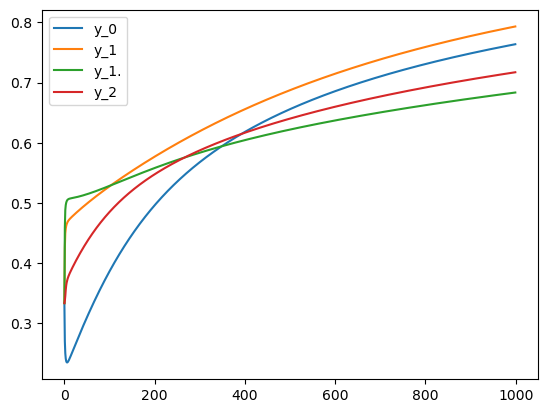

In [1021]:
y_0 = [model.re1[i][0][0] for i in range(1000)]
y_1 = [model.re1[i][1][1] for i in range(1000)]
y_11 =[model.re1[i][2][1] for i in range(1000)]
y_2 = [model.re1[i][3][2] for i in range(1000)]

dct={'y_0':y_0,'y_1':y_1,'y_1.':y_11,'y_2':y_2}
[plt.plot(v,label=i) for i,v in dct.items()]
plt.legend()
plt.show()